# 机器学习


决策树


## 使用决策树模型

In [1]:
from sklearn import tree

## 鸢尾花数据


Iris Data Set（鸢尾属植物数据集）是我现在接触到的历史最悠久的数据集，它首次出现在著名的英国统计学家和生物学家Ronald Fisher 1936年的论文《The use of multiple measurements in taxonomic problems》中，被用来介绍线性判别式分析。在这个数据集中，包括了三类不同的鸢尾属植物：Iris Setosa，Iris Versicolour，Iris Virginica。每类收集了50个样本，因此这个数据集一共包含了150个样本。

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

### 鸢尾花的参数


该数据集测量了所有150个样本的4个特征，分别是：

1. sepal length（花萼长度）
2. sepal width（花萼宽度）
3. petal length（花瓣长度）
4. petal width（花瓣宽度）

以上四个特征的单位都是厘米（cm）。

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 鸢尾花的分类


1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica


> 这个分类比较难翻译，直接看英文吧

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 把数据以表格显示

In [5]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'])
df['分类'] = iris.target
df['分类'] = df['分类'].map(lambda x: iris.target_names[x])
df

,花萼长度,花萼宽度,花瓣长度,花瓣宽度,分类
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 可以输出成xls

In [6]:
df.to_excel('iris.xlsx')

## 模型训练


我们把鸢尾花的data作为x


taget作为y
> 注意计算机识别的都是数字，我们后期再转化为文字

In [7]:
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 预测


结构顺序输入参数，就可以得到结果


比如一个鸢尾花


1. sepal length（花萼长度）: 5cm
2. sepal width（花萼宽度）: 4cm
3. petal length（花瓣长度）: 3cm
4. petal width（花瓣宽度）: 2cm



另一个是


1. sepal length（花萼长度）: 2cm
2. sepal width（花萼宽度）: 3cm
3. petal length（花瓣长度）: 4cm
4. petal width（花瓣宽度）: 5cm


那么就是[5, 4, 3, 2]和[2, 3, 4, 5]

In [8]:
pre_X = [[5,4,3,2], [2,3,4,5]]
clf.predict(pre_X)

array([1, 1])

可以看到结果是1，和2


也就是versicolor和virginica



## 查看决策树分析

In [9]:
res = tree.export_text(decision_tree=clf, feature_names=['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'])
print(res)

|--- 花瓣长度 <= 2.45
|   |--- class: 0
|--- 花瓣长度 >  2.45
|   |--- 花瓣宽度 <= 1.75
|   |   |--- 花瓣长度 <= 4.95
|   |   |   |--- 花瓣宽度 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- 花瓣宽度 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- 花瓣长度 >  4.95
|   |   |   |--- 花瓣宽度 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- 花瓣宽度 >  1.55
|   |   |   |   |--- 花萼长度 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- 花萼长度 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- 花瓣宽度 >  1.75
|   |   |--- 花瓣长度 <= 4.85
|   |   |   |--- 花萼长度 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- 花萼长度 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- 花瓣长度 >  4.85
|   |   |   |--- class: 2



## 决策树的图形展示

[Text(418.5, 498.3, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(354.11538461538464, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(482.8846153846154, 407.70000000000005, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(257.53846153846155, 317.1, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(128.76923076923077, 226.5, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(64.38461538461539, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(193.15384615384616, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(386.3076923076923, 226.5, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(321.9230769

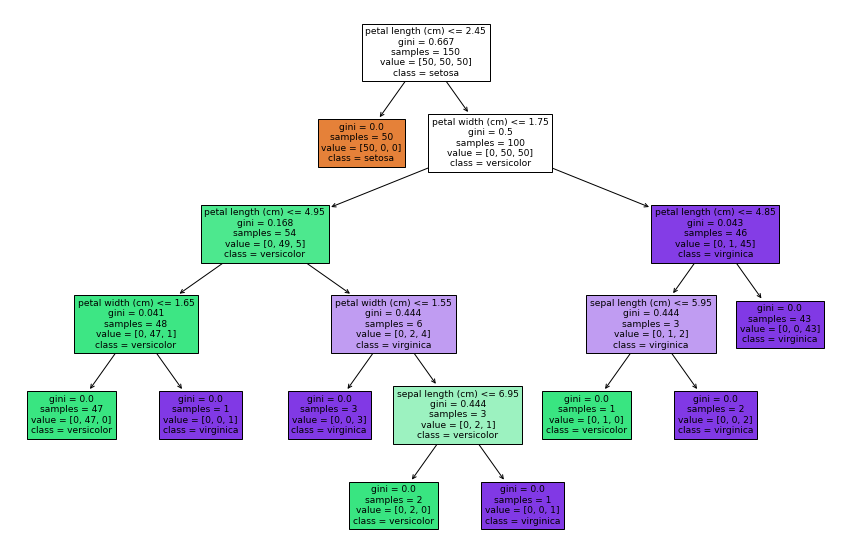

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10)) # 设定图形尺寸，否则太小
tree.plot_tree(
  clf,
  feature_names=iris.feature_names, # 特征
  class_names=iris.target_names, # 分类
  filled=True, # 颜色填充
)

## graphviz


可以输出pdf

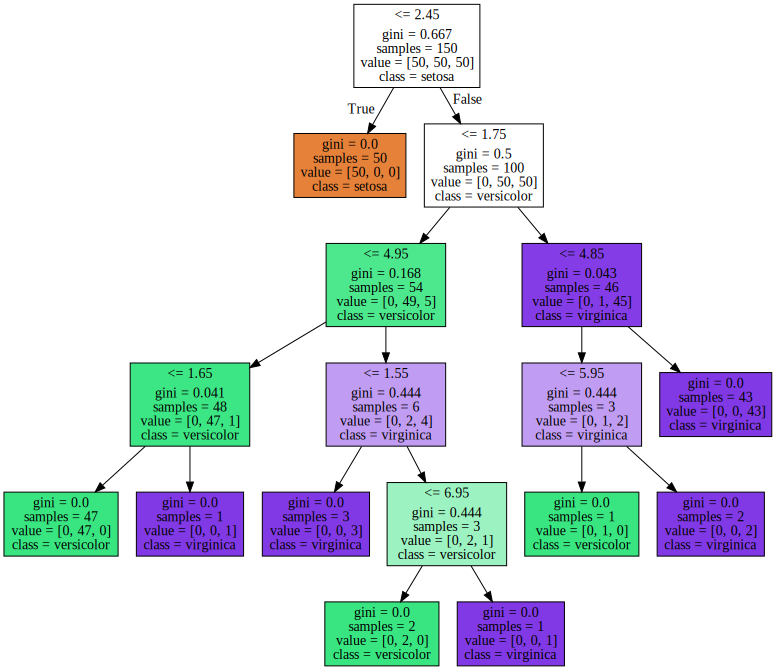

In [11]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
  feature_names=['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'], # 特征
  class_names=iris.target_names, # 分类
  filled=True, # 颜色填充
)
graph = graphviz.Source(dot_data)
graph